In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# import glob
# df = pd.concat([pd.read_csv(csv_file, header=0) for csv_file in glob.glob("enron/*.csv")])

# Files are read in different order by different systems
 
it_emails = pd.read_csv("enron/it_labeled.csv", header=0)
legal_emails = pd.read_csv("enron/legal_labeled.csv", header=0)
sales_emails = pd.read_csv("enron/sales_and_marketing_labeled.csv", header=0)
hr_emails = pd.read_csv("enron/human_resources_labeled.csv", header=0)
df = pd.concat([it_emails, legal_emails, sales_emails, hr_emails])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 0 to 302
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  1344 non-null   object
 1   label    1344 non-null   object
dtypes: object(2)
memory usage: 31.5+ KB


In [2]:
import nltk
nltk.download('stopwords')
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def tokenize(text):

    #1. Normalize: Convert to lower case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower().strip())
    text = re.sub(" +", " ",text)
    
    #2. Tokenizing: split text into words
    tokens = word_tokenize(text)
    
    #3. Remove stop words: if a token is a stop word, then remove it
    words = [w for w in tokens if w not in stopwords.words("english")]
    
    #4. Lemmatize and Stemming
    lemmed_words = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    clean_tokens = []
    
    for i in lemmed_words:
        clean_tokens.append(i)
        
    # back to string from list
    text = " ".join(clean_tokens)
    return text

df['pro_message'] = df['message'].apply(lambda x: tokenize(x))

df.head(20)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] <urlopen error [Errno -3] Temporary failure in name
[nltk_data]     resolution>


,message,label,pro_message
0,"Lucy, I want to have an accurate rent roll as ...",Information Technology,lucy want accurate rent roll soon possible fax...
1,"Mary, I transferred $10,000 out of the checkin...",Information Technology,mary transferred 10 000 checking account monda...
2,I just spoke to the insurance company. They ar...,Information Technology,spoke insurance company going cancel prorate p...
3,I just spoke to the insurance company. They ar...,Information Technology,spoke insurance company going cancel prorate p...
4,"Lucy, Somehow my email account lost the rentro...",Information Technology,lucy somehow email account lost rentroll sent ...
5,"Susan, Raised your issue to Sally Beck. Larry ...",Information Technology,susan raised issue sally beck larry going spen...
6,buy 100 nov gas market sell 100 nov gas 2.635 ...,Information Technology,buy 100 nov gas market sell 100 nov gas 2 635 ...
7,sell 100 nov gas market buy 100 nov gas 2.705 ...,Information Technology,sell 100 nov gas market buy 100 nov gas 2 705 ...
8,go to market with 2.635 stop _________________...,Information Technology,go market 2 635 stop yahoo make great connecti...
9,buy 100 nov gas market sell 100 nov gas 2.94 s...,Information Technology,buy 100 nov gas market sell 100 nov gas 2 94 s...


In [3]:
X_data = df["pro_message"]
y_data = df["label"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=29)

In [4]:
pipeline = Pipeline([
    ("vect", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB())
])

model = pipeline.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [5]:
from sklearn.metrics import accuracy_score

predicted_y = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y)

print("Accuracy of the model is: ", round(accuracy, 4) * 100, "%")

Accuracy of the model is:  83.64 %


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Human Resources'),
  Text(0, 1.5, 'Information Technology'),
  Text(0, 2.5, 'Legal'),
  Text(0, 3.5, 'Marketing & Sales')])

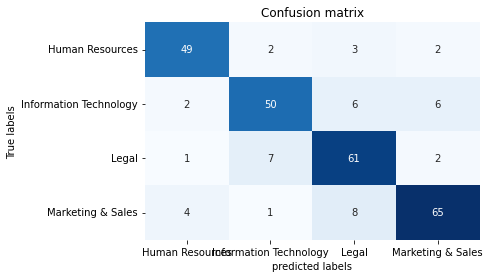

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

classes = np.unique(y_test)

cm = confusion_matrix(y_test, predicted_y)
fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="predicted labels", ylabel="True labels", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [7]:
model.predict(["Im here to fix you internet connection and printer."])

array(['Information Technology'], dtype='<U22')